⬇︎現在讓我們擴展輸入特徵集，例如添加特徵 1 ** 2（第二個特徵的平方）作為新特徵。我們不再將每個資料點表示為二維點 (feature0, feature1)，而是將其表示為三維點 (feature0, feature1, feature1 ** 2)。以下是以三維散佈圖的形式展示了這種新的表示方式：

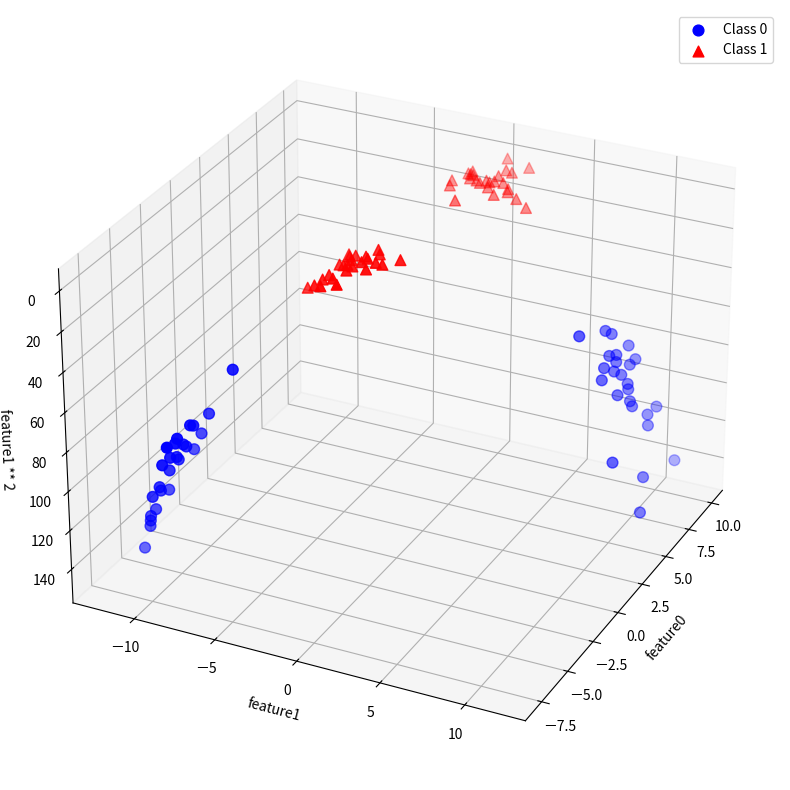

In [1]:
from sklearn.datasets import make_blobs
import mglearn
import matplotlib as mlp
from matplotlib.font_manager import fontManager
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import numpy as np

fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

X, y= make_blobs(centers=4, random_state=8)
y = y % 2
X_new = np.hstack((X,X[:, 1:] ** 2)) #請參考說明1
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 設置數據點
ax.view_init(elev=-152, azim=-26)

# 繪製數據點
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60, label='Class 0')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60, label='Class 1')

# 設置標籤
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

# 添加圖例
ax.legend()

# 顯示圖形
plt.tight_layout()
plt.show()



### 說明1


`np.hstack()` 是 NumPy 中的一個函數，用於水平堆疊（horizontal stacking）陣列。它的主要特點是：

1. **基本功能**：
   - 將多個陣列沿著水平方向（第二個軸，axis=1）連接在一起
   - 輸入的陣列必須具有相同的第一個維度（行數）

2. **語法**：
```python
np.hstack((array1, array2, ...))
```

3. **使用範例**：
```python
import numpy as np

# 範例1：一維陣列
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
result = np.hstack((a, b))  # 結果：[1, 2, 3, 4, 5, 6]

# 範例2：二維陣列
a = np.array([[1, 2], [3, 4]])
b = np.array([[5], [6]])
result = np.hstack((a, b))  # 結果：[[1, 2, 5], [3, 4, 6]]
```


```python
X_new = np.hstack([X, X[:, 1:] ** 2]) #如果只有X[:, 1],會只有1維,如果是X[:, 1:]會維持2維
```

這行程式碼的作用是：
1. `X` 是原始的特徵矩陣
2. `X[:, 1:]` 選取了 `X` 中除了第一列之外的所有列
3. `X[:, 1:] ** 2` 對選取的部分進行平方運算
4. `np.hstack()` 將原始矩陣 `X` 和平方後的特徵矩陣水平連接在一起

這種操作通常用於：
- 特徵工程
- 增加非線性特徵
- 在機器學習中擴展特徵空間

例如，如果 `X` 是一個 3x2 的矩陣：
```python
X = np.array([[1, 2],
              [3, 4],
              [5, 6]])
```

執行 `X_new = np.hstack([X, X[:, 1:] ** 2])` 後，`X_new` 會變成：
```python
X_new = np.array([[1, 2, 4],    # 4 是 2 的平方
                  [3, 4, 16],   # 16 是 4 的平方
                  [5, 6, 36]])  # 36 是 6 的平方
```

這種操作在核化支援向量機（Kernel SVM）中特別有用，因為它可以幫助模型捕捉特徵之間的非線性關係。

Text(0.5, 0, 'feature0 ** 2')

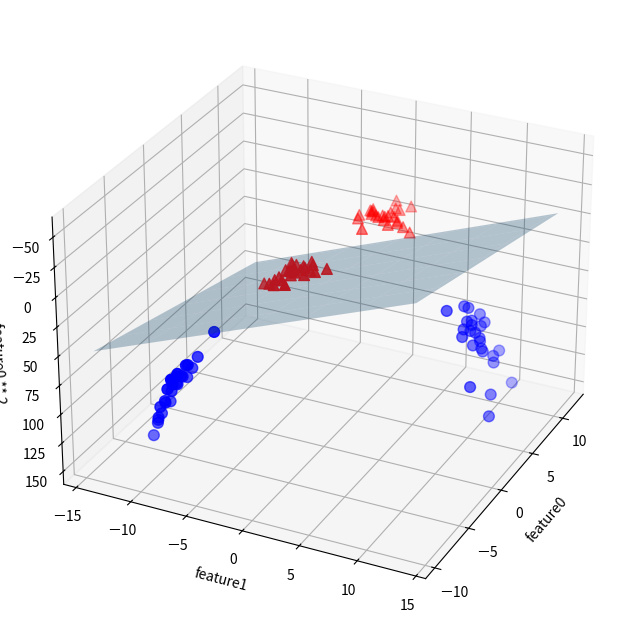

In [2]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# show linear decision boundary
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # 正确的创建3D图形的方式

# 设置视角
ax.view_init(elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")